# 1. Loading files

In [13]:
import glob

In [14]:
path = "/home/nishon/Projects/python/vechical-detect-and-track/data/raw"
all_files = glob.glob(path + "/*.csv")
print(all_files)

['/home/nishon/Projects/python/vechical-detect-and-track/data/raw/5.csv', '/home/nishon/Projects/python/vechical-detect-and-track/data/raw/4.csv', '/home/nishon/Projects/python/vechical-detect-and-track/data/raw/3.csv', '/home/nishon/Projects/python/vechical-detect-and-track/data/raw/2.csv', '/home/nishon/Projects/python/vechical-detect-and-track/data/raw/7.csv']


In [15]:
import pandas as pd

In [25]:
li = []
for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,Unnamed: 0,frame_number,x,y,w,h,label
0,0,0,106,0,35,27,Bike
1,1,0,121,0,34,36,Bike
2,2,0,117,0,45,26,Bike
3,3,0,134,38,44,43,Bike
4,4,0,147,36,44,36,Bike


# 2. Calculate aspect ratio
- [Link 1](https://math.stackexchange.com/questions/180804/how-to-get-the-aspect-ratio-of-an-image)

## 2.1. Grouping raw numbers 

In [26]:
def get_aspect_ratio(w,h):
     return w/h

In [32]:
def map_to_ratio(row):
    return get_aspect_ratio(row['w'],row['h'])

frame['ratio'] =frame.apply(map_to_ratio, axis=1)
frame.head()

,Unnamed: 0,frame_number,x,y,w,h,label,ratio
0,0,0,106,0,35,27,Bike,1.296296
1,1,0,121,0,34,36,Bike,0.944444
2,2,0,117,0,45,26,Bike,1.730769
3,3,0,134,38,44,43,Bike,1.023256
4,4,0,147,36,44,36,Bike,1.222222


In [51]:
grouped = frame.groupby('ratio').size()
print("Found {} groups".format(len(grouped)))

Found 1446 groups


## 2.2. Grouping rounded off numbers 

In [77]:
import math
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

In [78]:
a = 1.730769
round_half_up(a,2)

1.73

In [79]:
li = []
for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,Unnamed: 0,frame_number,x,y,w,h,label
0,0,0,106,0,35,27,Bike
1,1,0,121,0,34,36,Bike
2,2,0,117,0,45,26,Bike
3,3,0,134,38,44,43,Bike
4,4,0,147,36,44,36,Bike


In [81]:
def map_to_ratio(row):
    return round_half_up(
        get_aspect_ratio(row['w'],row['h'])
        ,2)

In [82]:
frame['ratio'] =frame.apply(map_to_ratio, axis=1)
frame.head()

,Unnamed: 0,frame_number,x,y,w,h,label,ratio
0,0,0,106,0,35,27,Bike,1.30
1,1,0,121,0,34,36,Bike,0.94
2,2,0,117,0,45,26,Bike,1.73
3,3,0,134,38,44,43,Bike,1.02
4,4,0,147,36,44,36,Bike,1.22


In [83]:
grouped = frame.groupby('ratio').size()
print("Found {} groups".format(len(grouped)))

Found 168 groups


## 2.3. Grouping fractions

In [86]:
li = []
for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,Unnamed: 0,frame_number,x,y,w,h,label
0,0,0,106,0,35,27,Bike
1,1,0,121,0,34,36,Bike
2,2,0,117,0,45,26,Bike
3,3,0,134,38,44,43,Bike
4,4,0,147,36,44,36,Bike


In [87]:
def map_to_ratio(row):
    return round_half_up(
        get_aspect_ratio(row['w'],row['h'])
        ,1).as_integer_ratio()

- [Reference link](https://stackoverflow.com/questions/23344185/how-to-convert-a-decimal-number-into-fraction)

In [88]:
frame['ratio'] =frame.apply(map_to_ratio, axis=1)
frame.head()

,Unnamed: 0,frame_number,x,y,w,h,label,ratio
0,0,0,106,0,35,27,Bike,"(5854679515581645, 4503599627370496)"
1,1,0,121,0,34,36,Bike,"(8106479329266893, 9007199254740992)"
2,2,0,117,0,45,26,Bike,"(7656119366529843, 4503599627370496)"
3,3,0,134,38,44,43,Bike,"(1, 1)"
4,4,0,147,36,44,36,Bike,"(5404319552844595, 4503599627370496)"


In [89]:
grouped = frame.groupby('ratio').size()
print("Found {} groups".format(len(grouped)))

Found 27 groups


AxesSubplot(0.125,0.125;0.775x0.755)


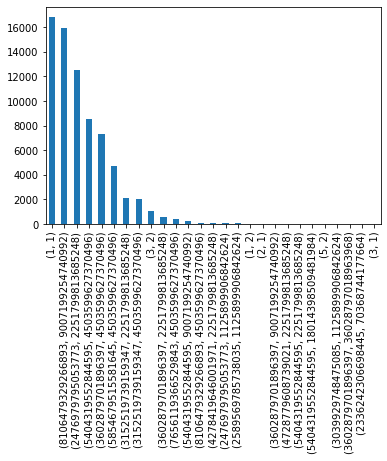

In [91]:
import matplotlib.pyplot as plt
print(pd.value_counts(frame['ratio']).plot.bar())